In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import string
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import random
import nltk
import tensorflow
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Dense, LSTM, Dropout
from pandas import Series, DataFrame
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.models import Sequential

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
os.chdir('/content/drive/MyDrive/WGU: Data Analytics/D213: Advanced Data Analytics/PA_Task2/')
column_names=['review','sentiment']
data=pd.read_csv("yelp_labelled.txt",sep='\t',header=None, names=column_names)
pd.set_option('max_colwidth', 160)
data=data.reset_index(drop=True)
data.head(8)

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0


In [ ]:
data['sentiment'].value_counts()

1    500
0    500
Name: sentiment, dtype: int64

In [ ]:
data.isnull().sum()
data.dropna()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
...,...,...
995,I think food should have flavor and texture and both were lacking.,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go back.,0
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0


In [ ]:
#remove punctuation
import re
p=re.compile(r'[^\w\s]+')
data['review']=[p.sub('',x)for x in data['review'].tolist()]
data

,review,sentiment
0,Wow Loved this place,1
1,Crust is not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it,1
4,The selection on the menu was great and so were the prices,1
...,...,...
995,I think food should have flavor and texture and both were lacking,0
996,Appetite instantly gone,0
997,Overall I was not impressed and would not go back,0
998,The whole experience was underwhelming and I think well just go to Ninja Sushi next time,0


In [ ]:
data['review'].str.lower()

0                                                                                                                    wow loved this place
1                                                                                                                       crust is not good
2                                                                                                not tasty and the texture was just nasty
3                                                  stopped by during the late may bank holiday off rick steve recommendation and loved it
4                                                                              the selection on the menu was great and so were the prices
                                                                      ...                                                                
995                                                                     i think food should have flavor and texture and both were lacking
996                               

In [ ]:
#tokenization
data['tokens']=data['review'].apply(lambda x: word_tokenize(x.lower()))
#remove stop words
stop_words=set(stopwords.words('english'))
data['tokens']=data['tokens'].apply(lambda x:[word for word in x if word not in stop_words])
data['tokens']

0                                                                        [wow, loved, place]
1                                                                              [crust, good]
2                                                                    [tasty, texture, nasty]
3                    [stopped, late, may, bank, holiday, rick, steve, recommendation, loved]
4                                                           [selection, menu, great, prices]
                                               ...                                          
995                                                  [think, food, flavor, texture, lacking]
996                                                              [appetite, instantly, gone]
997                                                    [overall, impressed, would, go, back]
998            [whole, experience, underwhelming, think, well, go, ninja, sushi, next, time]
999    [hadnt, wasted, enough, life, poured, salt, wound, drawing, tim

In [ ]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'was': 4,
 'a': 5,
 'to': 6,
 'is': 7,
 'this': 8,
 'it': 9,
 'of': 10,
 'food': 11,
 'not': 12,
 'in': 13,
 'for': 14,
 'place': 15,
 'good': 16,
 'we': 17,
 'service': 18,
 'great': 19,
 'had': 20,
 'my': 21,
 'that': 22,
 'were': 23,
 'so': 24,
 'with': 25,
 'you': 26,
 'back': 27,
 'be': 28,
 'very': 29,
 'but': 30,
 'are': 31,
 'have': 32,
 'at': 33,
 'here': 34,
 'they': 35,
 'on': 36,
 'like': 37,
 'all': 38,
 'our': 39,
 'time': 40,
 'really': 41,
 'as': 42,
 'will': 43,
 'go': 44,
 'there': 45,
 'an': 46,
 'best': 47,
 'just': 48,
 'their': 49,
 'one': 50,
 'dont': 51,
 'out': 52,
 'delicious': 53,
 'no': 54,
 'ever': 55,
 'friendly': 56,
 'would': 57,
 'up': 58,
 'your': 59,
 'did': 60,
 'by': 61,
 'also': 62,
 'if': 63,
 'nice': 64,
 'only': 65,
 'restaurant': 66,
 'never': 67,
 'came': 68,
 'from': 69,
 'what': 70,
 'again': 71,
 'us': 72,
 'im': 73,
 'vegas': 74,
 'when': 75,
 'experience': 76,
 'wont': 77,
 'going': 78,
 'amazing': 79,
 'be

In [ ]:
#convert to sequences
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data['tokens'])
sequences=tokenizer.texts_to_sequences(data['tokens'])
max_len=200
padded=pad_sequences(sequences, maxlen=max_length, padding='post',truncating='post')
padded

array([[ 330,   90,    2, ...,    0,    0,    0],
       [ 481,    3,    0, ...,    0,    0,    0],
       [  77,  331,  332, ...,    0,    0,    0],
       ...,
       [ 128,  144,   12, ...,    0,    0,    0],
       [ 713,   27,  536, ...,    0,    0,    0],
       [1961, 1962,   72, ...,    0,    0,    0]], dtype=int32)

In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(padded, data['sentiment'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # Further split into training and validation

# Check the shape of the data
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)


X_train shape: (600, 20)
X_val shape: (200, 20)
X_test shape: (200, 20)


In [ ]:
#vectorization
max_words=5000
max_len=200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
#convert to sequence
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

#pad for uniform len
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
#export
X_train_df = pd.DataFrame({'review': X_train_pad.tolist()})
X_test_df = pd.DataFrame({'review': X_test_pad.tolist()})
y_train_df = pd.DataFrame({'sentiment': y_train})
y_test_df = pd.DataFrame({'sentiment': y_test})

X_train_df.to_csv('X_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

# Download CSV files to local machine
from google.colab import files
files.download('X_train.csv')
files.download('X_test.csv')
files.download('y_train.csv')
files.download('y_test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('y_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#split into validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(800,)
(200,)
(200,)


In [ ]:
#define model
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_length))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/5
19/19 [==============================] - 7s 113ms/step - loss: 0.6971 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5050
Epoch 2/5
19/19 [==============================] - 2s 123ms/step - loss: 0.6928 - accuracy: 0.5050 - val_loss: 0.6925 - val_accuracy: 0.5050
Epoch 3/5
19/19 [==============================] - 2s 79ms/step - loss: 0.6030 - accuracy: 0.6817 - val_loss: 0.7878 - val_accuracy: 0.6500
Epoch 4/5
19/19 [==============================] - 1s 68ms/step - loss: 0.2372 - accuracy: 0.9167 - val_loss: 0.6391 - val_accuracy: 0.7450
Epoch 5/5
7/7 [==============================] - 0s 10ms/step - loss: 0.5688 - accuracy: 0.7500
Test Loss: 0.5687685012817383, Test Accuracy: 0.75


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 100)           197000    
                                                                 
 lstm_7 (LSTM)               (None, 128)               117248    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 314377 (1.20 MB)
Trainable params: 314377 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


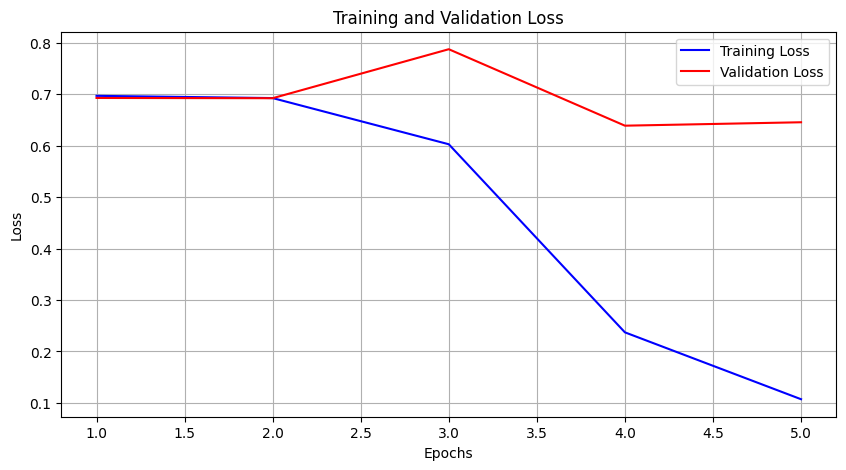

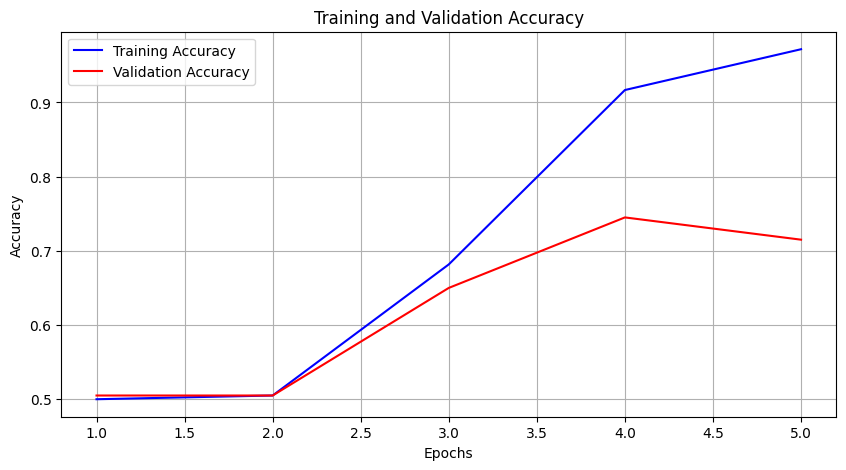

In [ ]:
# Extract training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#save trained network
from keras.models import load_model
model.save("trained_model.h5")
loaded_model=load_model("trained_model.h5")